<a href="https://colab.research.google.com/github/Roberto014/Anal-tica-de-datos-y-herramientas-de-inteligencia-artificial-II/blob/main/Act%203.8%20An%C3%A1lisis%20Socioformador/Act_3_8_An%C3%A1lisis_SocioformadorCategorizar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install scipy

In [ ]:
%pip install funpymodeling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.

In [ ]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from funpymodeling.exploratory import freq_tbl

##Etapa I. Modelado explicativo

a) Extracción de características. Dividir en 4 subdataframes el dataset principal (De acuerdo a cada emoción: (“Cansancio”, “Ansiedad”, “Dolor” y “Meditación”),

Categorizar las 20 variables del “FAE sensor” utilizando la regla de STURGES y obtener el análisis univariado de cada una, poniendo como etiquetas los rangos obtenidos en cada una de ellas.

In [ ]:
df = pd.read_csv("reto1.csv")

In [ ]:
df1 = pd.read_csv("reto2.csv")

In [ ]:
df2 = pd.read_csv("reto3.csv")

In [ ]:
df3 = pd.read_csv("reto4.csv")

In [ ]:
df4 = pd.read_csv("reto5.csv")

In [ ]:
df.head(5)

,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,F6EES,F8EIX,F7EIS,F9EEX,F10ES,F11EX,F12ES,F13EV,F14EV,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS,01_C,02_A,03_D,04_M
0,0.191246,0.069119,0.117477,0.256040,0.009921,1.000000,0.00,0.0,0.354846,0.445257,0.384249,0.312719,0.292046,0.391682,0.273876,0.312330,0.676243,0.748927,0.134744,0.485066,0.247663,0.462543,0.389137,0.324511,0.144152,0.710069,0.645510,0.412842,-1,-1,-1,-1
1,0.227600,0.022417,0.170484,0.269475,0.056222,1.000000,0.00,0.0,0.382919,0.440840,0.389022,0.323435,0.328019,0.402955,0.292225,0.306896,0.672230,0.742742,0.132401,0.472204,0.244596,0.472201,0.391302,0.306889,0.157104,0.649362,0.648283,0.412262,-1,-1,-1,-1
2,0.197158,0.016593,0.090188,0.256400,0.071611,0.833333,0.25,0.5,0.285470,0.423134,0.386705,0.329804,0.272604,0.403396,0.287587,0.301800,0.669365,0.746827,0.128568,0.447680,0.259314,0.463058,0.384738,0.296270,0.162034,0.639515,0.618015,0.398226,-1,-1,-1,-1
3,0.142945,0.052955,0.073806,0.157591,0.050316,0.833333,0.50,0.0,0.254811,0.534744,0.430538,0.376253,0.267529,0.486212,0.323617,0.350047,0.666377,0.771188,0.144030,0.485036,0.293134,0.511605,0.430833,0.286023,0.187410,0.632932,0.612956,0.383100,-1,-1,-1,-1
4,0.139948,0.049105,0.122286,0.138448,0.042417,0.666667,0.50,0.0,0.190403,0.563610,0.395787,0.337842,0.227500,0.497979,0.254919,0.344094,0.685965,0.811355,0.121494,0.465100,0.280508,0.511165,0.399840,0.305029,0.213902,0.642250,0.580537,0.356163,-1,-1,-1,-1


In [ ]:
pd.options.display.max_columns = None

In [ ]:
df

,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,F6EES,...,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS,01_C,02_A,03_D,04_M
0,0.191246,0.069119,0.117477,0.256040,0.009921,1.000000,0.000000,0.000000,0.354846,0.445257,...,0.389137,0.324511,0.144152,0.710069,0.645510,0.412842,-1,-1,-1,-1
1,0.227600,0.022417,0.170484,0.269475,0.056222,1.000000,0.000000,0.000000,0.382919,0.440840,...,0.391302,0.306889,0.157104,0.649362,0.648283,0.412262,-1,-1,-1,-1
2,0.197158,0.016593,0.090188,0.256400,0.071611,0.833333,0.250000,0.500000,0.285470,0.423134,...,0.384738,0.296270,0.162034,0.639515,0.618015,0.398226,-1,-1,-1,-1
3,0.142945,0.052955,0.073806,0.157591,0.050316,0.833333,0.500000,0.000000,0.254811,0.534744,...,0.430833,0.286023,0.187410,0.632932,0.612956,0.383100,-1,-1,-1,-1
4,0.139948,0.049105,0.122286,0.138448,0.042417,0.666667,0.500000,0.000000,0.190403,0.563610,...,0.399840,0.305029,0.213902,0.642250,0.580537,0.356163,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9188,0.407020,0.350278,0.579470,0.290449,0.730194,0.190476,0.000000,0.000000,0.269351,0.117915,...,0.527231,0.341969,0.272908,0.776797,0.274091,0.245180,-1,-1,-1,-1
9189,0.324212,0.552481,0.463448,0.210629,0.642435,0.198413,0.035714,0.058824,0.321959,0.160984,...,0.535101,0.348980,0.250174,0.773886,0.326970,0.257277,-1,-1,-1,-1
9190,0.128117,0.073647,0.175793,0.096799,0.251388,0.206349,0.035714,0.058824,0.314978,0.177591,...,0.521773,0.354896,0.202753,0.818124,0.384140,0.317961,-1,-1,-1,-1
9191,0.170067,0.028584,0.277457,0.118724,0.281708,0.214286,0.000000,0.000000,0.287029,0.166591,...,0.548478,0.388358,0.203535,0.849418,0.437443,0.384135,-1,-1,-1,-1


In [ ]:
filtro = df[df["01_C"] == 1]
filtro

,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,F6EES,...,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS,01_C,02_A,03_D,04_M
541,0.113887,0.124697,0.027252,0.165311,0.030352,1.000000,0.000000,0.000000,0.382705,0.543115,...,0.579768,0.482031,0.389961,0.446523,0.547479,0.309230,1,-1,-1,1
542,0.079856,0.012105,0.058577,0.117830,0.025480,0.666667,0.500000,0.000000,0.407816,0.628853,...,0.667279,0.413487,0.254316,0.799305,0.603402,0.488302,1,-1,-1,-1
543,0.066518,0.004933,0.024961,0.084477,0.064421,0.833333,0.500000,0.000000,0.394415,0.680187,...,0.627172,0.458465,0.328168,0.782442,0.554432,0.471489,1,-1,-1,-1
544,0.127785,0.083641,0.129497,0.050828,0.073877,0.833333,0.250000,0.500000,0.393504,0.706428,...,0.617237,0.490490,0.377981,0.776731,0.524078,0.478002,1,-1,-1,-1
545,0.127386,0.084154,0.141091,0.076182,0.030312,0.833333,0.250000,0.500000,0.464759,0.728709,...,0.587643,0.460727,0.385479,0.760682,0.535604,0.477068,1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9173,0.049598,0.106105,0.113748,0.022718,0.102517,0.031746,0.035714,0.058824,0.279653,0.340123,...,0.414795,0.512585,0.487496,0.553429,0.190509,0.107747,1,-1,-1,-1
9174,0.042033,0.087631,0.008415,0.061841,0.057718,0.039683,0.035714,0.058824,0.185596,0.266215,...,0.411117,0.491545,0.451545,0.578229,0.159818,0.097598,1,-1,-1,-1
9175,0.061331,0.040508,0.065291,0.073318,0.056222,0.047619,0.000000,0.000000,0.209231,0.237289,...,0.414312,0.540862,0.415001,0.553425,0.181866,0.049778,1,-1,-1,-1
9176,0.088126,0.105939,0.156053,0.098682,0.003875,0.047619,0.000000,0.000000,0.259649,0.245231,...,0.423042,0.643202,0.350004,0.556252,0.205676,0.044429,1,-1,-1,-1


In [ ]:
filtro1 = df1[df1["01_C"] == 1]
filtro1

,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,F6EES,F8EIX,F7EIS,F9EEX,F10ES,F11EX,F12ES,F13EV,F14EV,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS,01_C,02_A,03_D,04_M
541,0.273860,0.181582,0.167837,0.352296,0.024925,0.900000,0.142857,0.333333,0.331562,0.490282,0.457828,0.444658,0.308924,0.412017,0.403655,0.457994,0.396074,0.501538,0.396039,0.507810,0.600560,0.420974,0.542998,0.461742,0.375384,0.457475,0.547261,0.319956,1,-1,-1,1
542,0.119565,0.023243,0.097335,0.162269,0.100597,0.800000,0.571429,0.000000,0.401941,0.643074,0.533137,0.481558,0.421819,0.627260,0.416288,0.597311,0.533691,0.661391,0.618663,0.669892,0.664638,0.413538,0.699368,0.438213,0.293222,0.792842,0.583612,0.485594,1,-1,-1,-1
543,0.132306,0.044857,0.152861,0.114031,0.080260,0.800000,0.428571,0.333333,0.401099,0.675505,0.530944,0.483913,0.422987,0.632527,0.415389,0.609056,0.494832,0.603010,0.583618,0.654305,0.613944,0.374683,0.644760,0.450589,0.320726,0.786603,0.563601,0.481239,1,-1,-1,-1
544,0.122556,0.083598,0.132276,0.107952,0.076477,0.800000,0.428571,0.666667,0.441173,0.694380,0.563194,0.521329,0.457608,0.643902,0.459473,0.614392,0.447514,0.546354,0.556815,0.608163,0.563539,0.340785,0.593675,0.447071,0.340901,0.774153,0.553204,0.478978,1,-1,-1,-1
545,0.108145,0.091991,0.120342,0.089688,0.073488,0.700000,0.285714,1.000000,0.436995,0.689453,0.582393,0.541037,0.464456,0.638503,0.465096,0.596304,0.423567,0.509701,0.544070,0.596012,0.523752,0.334111,0.563986,0.454855,0.335274,0.773265,0.552697,0.475098,1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9173,0.113360,0.120892,0.135071,0.107709,0.120641,0.028571,0.041667,0.071429,0.254302,0.278223,0.196148,0.136481,0.238152,0.300669,0.211149,0.319056,0.558533,0.544523,0.394856,0.394048,0.278462,0.194363,0.422357,0.505114,0.454191,0.576237,0.196240,0.128238,1,-1,-1,-1
9174,0.068731,0.103766,0.099680,0.057468,0.120773,0.038095,0.020833,0.047619,0.255402,0.291841,0.214060,0.156304,0.248809,0.311742,0.220787,0.320115,0.524059,0.519948,0.381344,0.412703,0.263738,0.203175,0.418348,0.539447,0.445387,0.557757,0.184221,0.082631,1,-1,-1,-1
9175,0.084225,0.103686,0.088466,0.108228,0.044290,0.042857,0.020833,0.023810,0.224467,0.264671,0.194157,0.141605,0.216558,0.283411,0.207772,0.285781,0.493580,0.497231,0.379588,0.428108,0.259199,0.205440,0.414404,0.578119,0.390751,0.568109,0.185685,0.070024,1,-1,-1,-1
9176,0.125605,0.074801,0.213996,0.110861,0.056505,0.047619,0.000000,0.000000,0.280128,0.298496,0.258400,0.202035,0.263168,0.321157,0.257488,0.330169,0.483857,0.488642,0.404021,0.423085,0.261417,0.204090,0.409727,0.623893,0.369364,0.549608,0.201902,0.049342,1,-1,-1,-1


In [ ]:
filtro2 = df2[df2["01_C"] == 1]
filtro2

,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,F6EES,F8EIX,F7EIS,F9EEX,F10ES,F11EX,F12ES,F13EV,F14EV,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS,01_C,02_A,03_D,04_M
541,0.410544,0.148090,0.308041,0.476829,0.111192,0.857143,0.333333,0.400000,0.334199,0.480881,0.438082,0.423370,0.311192,0.403798,0.384166,0.458882,0.395199,0.491100,0.371849,0.490686,0.565251,0.399341,0.522516,0.433144,0.373817,0.459277,0.551978,0.325154,1,-1,-1,1
542,0.176607,0.068685,0.208159,0.160480,0.127645,0.857143,0.444444,0.400000,0.391638,0.616987,0.517225,0.463866,0.409971,0.607257,0.395758,0.578115,0.547915,0.667956,0.587353,0.650010,0.616397,0.395726,0.650377,0.455125,0.278053,0.789801,0.574023,0.489014,1,-1,-1,-1
543,0.170668,0.085092,0.187350,0.162859,0.117696,0.785714,0.555556,0.400000,0.433189,0.663815,0.558245,0.509069,0.452244,0.635520,0.444051,0.605166,0.499494,0.612352,0.592736,0.633818,0.621398,0.383770,0.654815,0.435861,0.312301,0.783949,0.574398,0.486914,1,-1,-1,-1
544,0.130185,0.074371,0.135804,0.127003,0.087574,0.714286,0.444444,0.600000,0.429994,0.672215,0.558502,0.512580,0.454519,0.630982,0.442482,0.583871,0.463067,0.557959,0.555402,0.601618,0.566129,0.346042,0.598860,0.436535,0.306580,0.781306,0.572751,0.478240,1,-1,-1,-1
545,0.142116,0.097855,0.180280,0.087395,0.097380,0.785714,0.444444,0.800000,0.451815,0.681825,0.576331,0.536281,0.474621,0.631075,0.466485,0.580613,0.432247,0.520063,0.521746,0.578353,0.510893,0.320306,0.548742,0.441728,0.317502,0.780079,0.559001,0.479473,1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9173,0.165510,0.100520,0.229137,0.130150,0.106609,0.027211,0.029412,0.068966,0.296014,0.312671,0.256588,0.197126,0.281420,0.333583,0.267065,0.361688,0.538067,0.535194,0.407273,0.402933,0.288684,0.201012,0.428885,0.528601,0.420711,0.579206,0.227242,0.136619,1,-1,-1,-1
9174,0.158249,0.140837,0.163306,0.160194,0.101215,0.034014,0.029412,0.051724,0.262437,0.273689,0.213142,0.155921,0.242048,0.292895,0.225884,0.318128,0.521043,0.514208,0.404845,0.412254,0.279600,0.199976,0.421493,0.563075,0.410010,0.569578,0.204310,0.099788,1,-1,-1,-1
9175,0.140528,0.121350,0.197146,0.107690,0.113481,0.040816,0.014706,0.034483,0.292851,0.319974,0.254818,0.199737,0.282808,0.340102,0.260873,0.355370,0.509753,0.511291,0.405847,0.414383,0.267791,0.203596,0.413920,0.599159,0.404108,0.553793,0.197860,0.072933,1,-1,-1,-1
9176,0.144308,0.081440,0.140320,0.150364,0.041757,0.044218,0.014706,0.017241,0.222055,0.294049,0.210878,0.165896,0.224666,0.308840,0.224015,0.325206,0.468580,0.485035,0.374093,0.419171,0.238763,0.202456,0.399725,0.602892,0.352859,0.555876,0.188562,0.057733,1,-1,-1,-1


In [ ]:
filtro3 = df3[df3["01_C"] == 1]
filtro3

,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,F6EES,F8EIX,F7EIS,F9EEX,F10ES,F11EX,F12ES,F13EV,F14EV,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS,01_C,02_A,03_D,04_M
541,0.510310,0.166431,0.253373,0.470146,0.318962,0.833333,0.500000,0.285714,0.349818,0.504986,0.454307,0.438350,0.330934,0.425992,0.391503,0.489761,0.408495,0.502814,0.378651,0.486585,0.575000,0.411287,0.541410,0.405702,0.368841,0.457109,0.566426,0.328613,1,-1,-1,1
542,0.160409,0.095524,0.169119,0.162067,0.159479,0.777778,0.600000,0.571429,0.413011,0.593436,0.533421,0.477245,0.427389,0.589626,0.410937,0.571215,0.565117,0.667083,0.577806,0.639481,0.584833,0.402284,0.636593,0.447558,0.264311,0.805565,0.573076,0.502760,1,-1,-1,-1
543,0.134929,0.096028,0.142659,0.148580,0.128487,0.777778,0.500000,0.571429,0.416215,0.627432,0.541707,0.490618,0.437388,0.611671,0.421193,0.565403,0.511412,0.618484,0.564577,0.609986,0.578662,0.368774,0.613429,0.443186,0.276533,0.784971,0.578824,0.484954,1,-1,-1,-1
544,0.149484,0.102078,0.178066,0.125042,0.131752,0.777778,0.600000,0.571429,0.443240,0.660842,0.569562,0.523422,0.466668,0.627406,0.452932,0.580944,0.476069,0.577238,0.557478,0.604931,0.567594,0.358290,0.606280,0.434196,0.300458,0.786382,0.574197,0.485535,1,-1,-1,-1
545,0.125098,0.096078,0.146953,0.111394,0.118219,0.722222,0.600000,0.571429,0.458929,0.671729,0.585421,0.542262,0.481576,0.628559,0.469701,0.589834,0.458776,0.549252,0.535446,0.593531,0.529581,0.354281,0.578479,0.438236,0.309469,0.770613,0.565216,0.478095,1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9173,0.225053,0.124993,0.300985,0.169411,0.092773,0.029101,0.034884,0.067568,0.318213,0.329994,0.278965,0.218972,0.310851,0.346816,0.281387,0.376716,0.534113,0.536292,0.412301,0.412366,0.294567,0.206793,0.431608,0.551017,0.390820,0.586675,0.262811,0.141341,1,-1,-1,-1
9174,0.209621,0.134807,0.273120,0.168389,0.079770,0.031746,0.023256,0.054054,0.316116,0.329923,0.278838,0.221836,0.300617,0.350787,0.287959,0.379870,0.523827,0.525073,0.420569,0.406411,0.286293,0.201820,0.423100,0.577454,0.394088,0.571357,0.228290,0.117079,1,-1,-1,-1
9175,0.192880,0.135264,0.174875,0.192039,0.074113,0.037037,0.023256,0.040541,0.252123,0.294535,0.221928,0.171633,0.242690,0.310565,0.234492,0.341604,0.495496,0.500950,0.394959,0.408827,0.259171,0.198870,0.408501,0.585687,0.376259,0.559737,0.202409,0.083614,1,-1,-1,-1
9176,0.193795,0.131776,0.205078,0.178310,0.100866,0.042328,0.011628,0.027027,0.283848,0.330804,0.270425,0.217430,0.277804,0.346965,0.280463,0.374631,0.501192,0.502211,0.389408,0.417009,0.258865,0.209472,0.412317,0.593728,0.372312,0.544377,0.221444,0.087151,1,-1,-1,-1


In [ ]:
filtro4 = df4[df4["01_C"] == 1]
filtro4

,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,F6EES,F8EIX,F7EIS,F9EEX,F10ES,F11EX,F12ES,F13EV,F14EV,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS,01_C,02_A,03_D,04_M
541,0.434696,0.258801,0.218106,0.458550,0.274476,0.863636,0.500000,0.333333,0.364872,0.526677,0.491085,0.471952,0.347944,0.439916,0.417849,0.505824,0.446505,0.533589,0.398424,0.508078,0.590218,0.442552,0.570129,0.406908,0.362615,0.461723,0.562677,0.334288,1,-1,-1,1
542,0.139190,0.072966,0.126585,0.184909,0.151582,0.727273,0.500000,0.666667,0.407613,0.598340,0.522105,0.466805,0.417899,0.579696,0.408961,0.554333,0.566142,0.673344,0.563457,0.633286,0.554203,0.409540,0.620475,0.447136,0.262122,0.794405,0.598820,0.514264,1,-1,-1,-1
543,0.145937,0.098881,0.154945,0.157243,0.152124,0.772727,0.583333,0.666667,0.424903,0.603800,0.547194,0.494775,0.443710,0.591332,0.424223,0.557570,0.534019,0.628401,0.551673,0.614816,0.547459,0.378071,0.600196,0.444069,0.263347,0.803625,0.573152,0.498751,1,-1,-1,-1
544,0.137512,0.103904,0.140891,0.156611,0.137749,0.772727,0.583333,0.555556,0.442394,0.635176,0.566785,0.518896,0.462640,0.613200,0.447333,0.573639,0.499111,0.600355,0.546581,0.601847,0.546481,0.371382,0.594105,0.443368,0.284361,0.775556,0.571555,0.483615,1,-1,-1,-1
545,0.169428,0.116747,0.203544,0.133605,0.136558,0.772727,0.666667,0.444444,0.462007,0.665407,0.589789,0.548419,0.483622,0.630647,0.474534,0.595826,0.472817,0.562474,0.546631,0.610583,0.541608,0.384391,0.601480,0.439417,0.317399,0.768778,0.563073,0.483898,1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9173,0.201407,0.141924,0.342566,0.150338,0.084954,0.028139,0.039216,0.051546,0.306510,0.334403,0.274667,0.218790,0.298928,0.348394,0.274754,0.384069,0.523114,0.529216,0.415605,0.412003,0.296065,0.205500,0.431985,0.549316,0.371709,0.602631,0.261456,0.151787,1,-1,-1,-1
9174,0.217667,0.101118,0.319890,0.175950,0.079696,0.032468,0.029412,0.051546,0.299633,0.336812,0.274186,0.220363,0.298866,0.351469,0.278339,0.385271,0.510834,0.521429,0.402857,0.409542,0.275131,0.204648,0.419139,0.571710,0.366695,0.575514,0.250619,0.120553,1,-1,-1,-1
9175,0.219301,0.123337,0.293772,0.207804,0.083797,0.034632,0.019608,0.041237,0.304520,0.336975,0.287240,0.232294,0.293285,0.354459,0.299062,0.391175,0.514264,0.515138,0.404442,0.410009,0.275626,0.206950,0.420119,0.576957,0.369896,0.560459,0.242053,0.120685,1,-1,-1,-1
9176,0.178517,0.180606,0.198449,0.193743,0.094648,0.038961,0.019608,0.030928,0.283117,0.317674,0.272856,0.221363,0.270546,0.336241,0.292512,0.371011,0.502829,0.497626,0.394081,0.420640,0.255749,0.219543,0.420565,0.582169,0.352580,0.557310,0.247453,0.121717,1,-1,-1,-1


In [ ]:
df_concatenado = pd.concat([filtro,filtro1,filtro2,filtro3,filtro4], ignore_index=True)

In [ ]:
df_concatenado.head(5)

,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,F6EES,F8EIX,F7EIS,F9EEX,F10ES,F11EX,F12ES,F13EV,F14EV,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS,01_C,02_A,03_D,04_M
0,0.113887,0.124697,0.027252,0.165311,0.030352,1.000000,0.00,0.0,0.382705,0.543115,0.517121,0.503460,0.357613,0.447923,0.461042,0.507356,0.407262,0.527777,0.419226,0.545162,0.639994,0.461767,0.579768,0.482031,0.389961,0.446523,0.547479,0.309230,1,-1,-1,1
1,0.079856,0.012105,0.058577,0.117830,0.025480,0.666667,0.50,0.0,0.407816,0.628853,0.504554,0.453580,0.428949,0.610258,0.392783,0.569235,0.537723,0.657794,0.584089,0.629510,0.646110,0.371307,0.667279,0.413487,0.254316,0.799305,0.603402,0.488302,1,-1,-1,-1
2,0.066518,0.004933,0.024961,0.084477,0.064421,0.833333,0.50,0.0,0.394415,0.680187,0.524648,0.483652,0.410477,0.635724,0.423481,0.607450,0.469856,0.584088,0.576078,0.651183,0.597032,0.361740,0.627172,0.458465,0.328168,0.782442,0.554432,0.471489,1,-1,-1,-1
3,0.127785,0.083641,0.129497,0.050828,0.073877,0.833333,0.25,0.5,0.393504,0.706428,0.552392,0.512229,0.418528,0.646092,0.435016,0.646568,0.450175,0.552613,0.583544,0.680086,0.575193,0.373891,0.617237,0.490490,0.377981,0.776731,0.524078,0.478002,1,-1,-1,-1
4,0.127386,0.084154,0.141091,0.076182,0.030312,0.833333,0.25,0.5,0.464759,0.728709,0.609182,0.566421,0.482754,0.662989,0.497815,0.640291,0.413666,0.496080,0.567379,0.607918,0.552379,0.346643,0.587643,0.460727,0.385479,0.760682,0.535604,0.477068,1,-1,-1,-1


In [ ]:
df_concatenado.to_csv("df_concatenado.csv")

In [ ]:
#descardar archivo filtrado en csv
from google.colab import files


files.download("df_concatenado.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_concatenado.shape

(815, 32)

In [ ]:
valores_nulos = df_concatenado.isnull().sum()
valores_nulos

,0
Veloc,0
Acele,0
Des_x,0
Des_y,0
Des_z,0
Presn,0
VelPr,0
AcePr,0
F5EEX,0
F6EES,0


In [ ]:
df_concatenado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Veloc   815 non-null    float64
 1   Acele   815 non-null    float64
 2   Des_x   815 non-null    float64
 3   Des_y   815 non-null    float64
 4   Des_z   815 non-null    float64
 5   Presn   815 non-null    float64
 6   VelPr   815 non-null    float64
 7   AcePr   815 non-null    float64
 8   F5EEX   815 non-null    float64
 9   F6EES   815 non-null    float64
 10  F8EIX   815 non-null    float64
 11  F7EIS   815 non-null    float64
 12  F9EEX   815 non-null    float64
 13  F10ES   815 non-null    float64
 14  F11EX   815 non-null    float64
 15  F12ES   815 non-null    float64
 16  F13EV   815 non-null    float64
 17  F14EV   815 non-null    float64
 18  F17MS   815 non-null    float64
 19  F18MX   815 non-null    float64
 20  F15MS   815 non-null    float64
 21  F16MX   815 non-null    float64
 22  F1

<Figure size 1500x800 with 0 Axes>

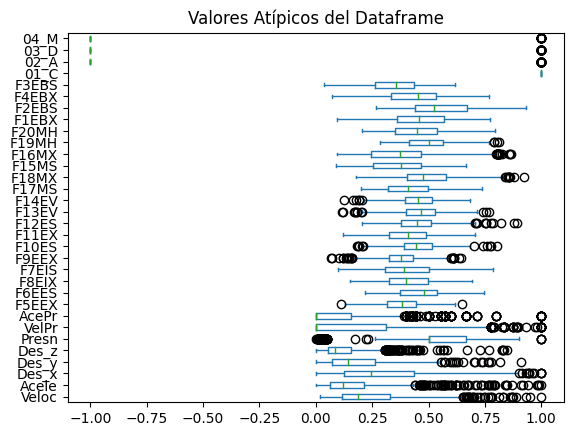

In [ ]:
fig = plt.figure(figsize =(15, 8))
df_concatenado.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #Dibujamos el diagrama

In [ ]:
y = df_concatenado
limite_superior = y.mean() + 3*y.std()
limite_inferior = y.mean() - 3*y.std()
print("Limite superior permitido", limite_superior)
print("Limite inferior permitido", limite_inferior)
#Estos representan los límites que se tienen en la campana de gauss


Limite superior permitido Veloc    0.757562
Acele    0.721984
Des_x    0.961632
Des_y    0.617657
Des_z    0.495200
Presn    1.231080
VelPr    1.009643
AcePr    0.784432
F5EEX    0.648476
F6EES    0.776116
F8EIX    0.741485
F7EIS    0.766822
F9EEX    0.653273
F10ES    0.770468
F11EX    0.722262
F12ES    0.765784
F13EV    0.750622
F14EV    0.735175
F17MS    0.750750
F18MX    0.881430
F15MS    0.738769
F16MX    0.989600
F19MH    0.797252
F20MH    0.839847
F1EBX    0.858351
F2EBS    0.959711
F4EBX    0.855966
F3EBS    0.701853
01_C     1.000000
02_A     0.715107
03_D     0.641051
04_M     0.096596
dtype: float64
Limite inferior permitido Veloc   -0.276822
Acele   -0.368158
Des_x   -0.354416
Des_y   -0.255777
Des_z   -0.239097
Presn   -0.257880
VelPr   -0.666556
AcePr   -0.533580
F5EEX    0.108805
F6EES    0.149042
F8EIX    0.070888
F7EIS    0.028470
F9EEX    0.104033
F10ES    0.121814
F11EX    0.082715
F12ES    0.132531
F13EV    0.163758
F14EV    0.170460
F17MS    0.083047
F18MX    0.0983

In [ ]:
data3 = df_concatenado[(y <= limite_superior) & (y >= limite_inferior)]
data3

,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,F6EES,F8EIX,F7EIS,F9EEX,F10ES,F11EX,F12ES,F13EV,F14EV,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS,01_C,02_A,03_D,04_M
0,0.113887,0.124697,0.027252,0.165311,0.030352,1.000000,0.000000,0.000000,0.382705,0.543115,0.517121,0.503460,0.357613,0.447923,0.461042,0.507356,0.407262,0.527777,0.419226,0.545162,0.639994,0.461767,0.579768,0.482031,0.389961,0.446523,0.547479,0.309230,1,-1.0,-1.0,NaN
1,0.079856,0.012105,0.058577,0.117830,0.025480,0.666667,0.500000,0.000000,0.407816,0.628853,0.504554,0.453580,0.428949,0.610258,0.392783,0.569235,0.537723,0.657794,0.584089,0.629510,0.646110,0.371307,0.667279,0.413487,0.254316,0.799305,0.603402,0.488302,1,-1.0,-1.0,-1.0
2,0.066518,0.004933,0.024961,0.084477,0.064421,0.833333,0.500000,0.000000,0.394415,0.680187,0.524648,0.483652,0.410477,0.635724,0.423481,0.607450,0.469856,0.584088,0.576078,0.651183,0.597032,0.361740,0.627172,0.458465,0.328168,0.782442,0.554432,0.471489,1,-1.0,-1.0,-1.0
3,0.127785,0.083641,0.129497,0.050828,0.073877,0.833333,0.250000,0.500000,0.393504,0.706428,0.552392,0.512229,0.418528,0.646092,0.435016,0.646568,0.450175,0.552613,0.583544,0.680086,0.575193,0.373891,0.617237,0.490490,0.377981,0.776731,0.524078,0.478002,1,-1.0,-1.0,-1.0
4,0.127386,0.084154,0.141091,0.076182,0.030312,0.833333,0.250000,0.500000,0.464759,0.728709,0.609182,0.566421,0.482754,0.662989,0.497815,0.640291,0.413666,0.496080,0.567379,0.607918,0.552379,0.346643,0.587643,0.460727,0.385479,0.760682,0.535604,0.477068,1,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,0.201407,0.141924,0.342566,0.150338,0.084954,0.028139,0.039216,0.051546,0.306510,0.334403,0.274667,0.218790,0.298928,0.348394,0.274754,0.384069,0.523114,0.529216,0.415605,0.412003,0.296065,0.205500,0.431985,0.549316,0.371709,0.602631,0.261456,0.151787,1,-1.0,-1.0,-1.0
811,0.217667,0.101118,0.319890,0.175950,0.079696,0.032468,0.029412,0.051546,0.299633,0.336812,0.274186,0.220363,0.298866,0.351469,0.278339,0.385271,0.510834,0.521429,0.402857,0.409542,0.275131,0.204648,0.419139,0.571710,0.366695,0.575514,0.250619,0.120553,1,-1.0,-1.0,-1.0
812,0.219301,0.123337,0.293772,0.207804,0.083797,0.034632,0.019608,0.041237,0.304520,0.336975,0.287240,0.232294,0.293285,0.354459,0.299062,0.391175,0.514264,0.515138,0.404442,0.410009,0.275626,0.206950,0.420119,0.576957,0.369896,0.560459,0.242053,0.120685,1,-1.0,-1.0,-1.0
813,0.178517,0.180606,0.198449,0.193743,0.094648,0.038961,0.019608,0.030928,0.283117,0.317674,0.272856,0.221363,0.270546,0.336241,0.292512,0.371011,0.502829,0.497626,0.394081,0.420640,0.255749,0.219543,0.420565,0.582169,0.352580,0.557310,0.247453,0.121717,1,-1.0,-1.0,-1.0


In [ ]:

#Corroboramos dataframes valores nulos del dataframe4 El metodo de desviacion detecta menos outliers
#Con el metodo rangointercualtilicoy el digrama de caja y bigote usa ese metodo de rangointercualitico
valores_nulos = data3.isnull().sum()
valores_nulos

,0
Veloc,15
Acele,22
Des_x,5
Des_y,12
Des_z,13
Presn,0
VelPr,0
AcePr,18
F5EEX,0
F6EES,0


In [ ]:
#Reemplazamos valores átipicos  (nulos deldataframe con "mean")
#Realizamos una copia del dataframe
data_clean = df_concatenado.copy()
data_clean = data_clean.fillna(round(y.mean(),1))
data_clean


,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,F6EES,F8EIX,F7EIS,F9EEX,F10ES,F11EX,F12ES,F13EV,F14EV,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS,01_C,02_A,03_D,04_M
0,0.113887,0.124697,0.027252,0.165311,0.030352,1.000000,0.000000,0.000000,0.382705,0.543115,0.517121,0.503460,0.357613,0.447923,0.461042,0.507356,0.407262,0.527777,0.419226,0.545162,0.639994,0.461767,0.579768,0.482031,0.389961,0.446523,0.547479,0.309230,1,-1,-1,1
1,0.079856,0.012105,0.058577,0.117830,0.025480,0.666667,0.500000,0.000000,0.407816,0.628853,0.504554,0.453580,0.428949,0.610258,0.392783,0.569235,0.537723,0.657794,0.584089,0.629510,0.646110,0.371307,0.667279,0.413487,0.254316,0.799305,0.603402,0.488302,1,-1,-1,-1
2,0.066518,0.004933,0.024961,0.084477,0.064421,0.833333,0.500000,0.000000,0.394415,0.680187,0.524648,0.483652,0.410477,0.635724,0.423481,0.607450,0.469856,0.584088,0.576078,0.651183,0.597032,0.361740,0.627172,0.458465,0.328168,0.782442,0.554432,0.471489,1,-1,-1,-1
3,0.127785,0.083641,0.129497,0.050828,0.073877,0.833333,0.250000,0.500000,0.393504,0.706428,0.552392,0.512229,0.418528,0.646092,0.435016,0.646568,0.450175,0.552613,0.583544,0.680086,0.575193,0.373891,0.617237,0.490490,0.377981,0.776731,0.524078,0.478002,1,-1,-1,-1
4,0.127386,0.084154,0.141091,0.076182,0.030312,0.833333,0.250000,0.500000,0.464759,0.728709,0.609182,0.566421,0.482754,0.662989,0.497815,0.640291,0.413666,0.496080,0.567379,0.607918,0.552379,0.346643,0.587643,0.460727,0.385479,0.760682,0.535604,0.477068,1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,0.201407,0.141924,0.342566,0.150338,0.084954,0.028139,0.039216,0.051546,0.306510,0.334403,0.274667,0.218790,0.298928,0.348394,0.274754,0.384069,0.523114,0.529216,0.415605,0.412003,0.296065,0.205500,0.431985,0.549316,0.371709,0.602631,0.261456,0.151787,1,-1,-1,-1
811,0.217667,0.101118,0.319890,0.175950,0.079696,0.032468,0.029412,0.051546,0.299633,0.336812,0.274186,0.220363,0.298866,0.351469,0.278339,0.385271,0.510834,0.521429,0.402857,0.409542,0.275131,0.204648,0.419139,0.571710,0.366695,0.575514,0.250619,0.120553,1,-1,-1,-1
812,0.219301,0.123337,0.293772,0.207804,0.083797,0.034632,0.019608,0.041237,0.304520,0.336975,0.287240,0.232294,0.293285,0.354459,0.299062,0.391175,0.514264,0.515138,0.404442,0.410009,0.275626,0.206950,0.420119,0.576957,0.369896,0.560459,0.242053,0.120685,1,-1,-1,-1
813,0.178517,0.180606,0.198449,0.193743,0.094648,0.038961,0.019608,0.030928,0.283117,0.317674,0.272856,0.221363,0.270546,0.336241,0.292512,0.371011,0.502829,0.497626,0.394081,0.420640,0.255749,0.219543,0.420565,0.582169,0.352580,0.557310,0.247453,0.121717,1,-1,-1,-1


In [ ]:
#Quiero ver los valores nulos en columnas
valores_nulos = data_clean.isnull().sum()
valores_nulos


,0
Veloc,0
Acele,0
Des_x,0
Des_y,0
Des_z,0
Presn,0
VelPr,0
AcePr,0
F5EEX,0
F6EES,0


In [ ]:
data_clean.to_csv("df_reto.csv")

In [ ]:
#descardar archivo filtrado en csv
from google.colab import files


files.download("df_reto.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Veloc   815 non-null    float64 
 1   Acele   815 non-null    float64 
 2   Des_x   815 non-null    float64 
 3   Des_y   815 non-null    float64 
 4   Des_z   815 non-null    float64 
 5   Presn   815 non-null    float64 
 6   VelPr   815 non-null    float64 
 7   AcePr   815 non-null    float64 
 8   F5EEX   815 non-null    category
 9   F6EES   815 non-null    category
 10  F8EIX   815 non-null    category
 11  F7EIS   813 non-null    category
 12  F9EEX   815 non-null    category
 13  F10ES   814 non-null    category
 14  F11EX   815 non-null    category
 15  F12ES   810 non-null    category
 16  F13EV   812 non-null    category
 17  F14EV   812 non-null    category
 18  F17MS   813 non-null    category
 19  F18MX   813 non-null    category
 20  F15MS   786 non-null    category
 21  F16MX   724 non-

In [ ]:
#Categorizar las siguientes variables: ” host_response_rate”, “host_acceptance_rate”, “host_total_listings_count”, “accommodates”, “bathrooms_text”, “beds”, “price”, “maximum_nights_avg_ntm”, “availability_365”, “number_of_reviews”, “review_scores_value”, “reviews_per_month” aplicando la regla de Sturges y desplegar en un gráfico las frecuencias de las categorías obtenidas.
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=data_clean['F5EEX'].max()
Min=data_clean['F5EEX'].min()
Limites= [Min, Max]
Limites
#0.10, 0.65

[0.11063436, 0.64824541]

In [ ]:
#Corroboramos valores nulos
valores_nulos=data_clean['F5EEX'].isnull().sum()
valores_nulos

0

In [ ]:
#Calculamos el rango R
R=Max-Min
R

0.53761105

In [ ]:

#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(65)
ni
#Un total de 7 categorias y 8 itervalos

7.01887234405428

In [ ]:
#Categorización de variables
#Declaramos 2 intervalos (menores de 100) y (mayores de 100)
intervalos=np.linspace(0.10, 0.65, 8)#El ultimo es el numero de intervalos
intervalos

array([0.1       , 0.17857143, 0.25714286, 0.33571429, 0.41428571,
       0.49285714, 0.57142857, 0.65      ])

In [ ]:
#Creamos las categorías
categorias= ["0.1-0.17","0.17-0.25","0.25-0.33","0.33-0.41","0.41-0.49","0.49-0.57","0.57-0.65"]

In [ ]:

#Finalmente creamos las categorías en la columna numérica
data_clean['F5EEX']=pd.cut(x= data_clean['F5EEX'], bins=intervalos, labels= categorias )

data_clean['F5EEX']

,F5EEX
0,0.33-0.41
1,0.33-0.41
2,0.33-0.41
3,0.33-0.41
4,0.41-0.49
...,...
810,0.25-0.33
811,0.25-0.33
812,0.25-0.33
813,0.25-0.33


In [ ]:
data_clean['F5EEX']

,F5EEX
0,0.33-0.41
1,0.33-0.41
2,0.33-0.41
3,0.33-0.41
4,0.41-0.49
...,...
810,0.25-0.33
811,0.25-0.33
812,0.25-0.33
813,0.25-0.33


In [ ]:
table1 = freq_tbl(data_clean['F5EEX'])
table1

,F5EEX,frequency,percentage,cumulative_perc
0,0.33-0.41,248,0.304294,0.304294
1,0.41-0.49,216,0.265031,0.569325
2,0.25-0.33,201,0.246626,0.815951
3,0.17-0.25,64,0.078528,0.894479
4,0.49-0.57,62,0.076074,0.970552
5,0.57-0.65,14,0.017178,0.987730
6,0.1-0.17,10,0.012270,1.000000


In [ ]:
#Categorizar las siguientes variables: ” host_response_rate”, “host_acceptance_rate”, “host_total_listings_count”, “accommodates”, “bathrooms_text”, “beds”, “price”, “maximum_nights_avg_ntm”, “availability_365”, “number_of_reviews”, “review_scores_value”, “reviews_per_month” aplicando la regla de Sturges y desplegar en un gráfico las frecuencias de las categorías obtenidas.
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=data_clean['F6EES'].max()
Min=data_clean['F6EES'].min()
Limites= [Min, Max]
Limites
#0.20, 0.75

[0.21855432, 0.74675638]

In [ ]:
#Corroboramos valores nulos
valores_nulos=data_clean['F6EES'].isnull().sum()
valores_nulos

0

In [ ]:
#Calculamos el rango R
R=Max-Min
R

0.52820206

In [ ]:

#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(75)
ni
#Un total de 7 categorias y 8 itervalos

7.225203394460444

In [ ]:
#Categorización de variables
#Declaramos 2 intervalos (menores de 100) y (mayores de 100)
intervalos=np.linspace(0.20, 0.75, 8)#El ultimo es el numero de intervalos
intervalos

array([0.2       , 0.27857143, 0.35714286, 0.43571429, 0.51428571,
       0.59285714, 0.67142857, 0.75      ])

In [ ]:
#Creamos las categorías
categorias= ["0.2-0.27","0.27-0.35","0.35-0.43","0.43-0.51","0.51-0.59","0.59-0.67","0.67-0.75"]

In [ ]:

#Finalmente creamos las categorías en la columna numérica
data_clean['F6EES']=pd.cut(x= data_clean['F6EES'], bins=intervalos, labels= categorias )

data_clean['F6EES']

,F6EES
0,0.51-0.59
1,0.59-0.67
2,0.67-0.75
3,0.67-0.75
4,0.67-0.75
...,...
810,0.27-0.35
811,0.27-0.35
812,0.27-0.35
813,0.27-0.35


In [ ]:
data_clean['F6EES']

,F6EES
0,0.51-0.59
1,0.59-0.67
2,0.67-0.75
3,0.67-0.75
4,0.67-0.75
...,...
810,0.27-0.35
811,0.27-0.35
812,0.27-0.35
813,0.27-0.35


In [ ]:
table2 = freq_tbl(data_clean['F6EES'])
table2

,F6EES,frequency,percentage,cumulative_perc
0,0.51-0.59,215,0.263804,0.263804
1,0.35-0.43,179,0.219632,0.483436
2,0.43-0.51,179,0.219632,0.703067
3,0.27-0.35,148,0.181595,0.884663
4,0.59-0.67,55,0.067485,0.952147
5,0.67-0.75,23,0.028221,0.980368
6,0.2-0.27,16,0.019632,1.000000


In [ ]:
#Categorizar las siguientes variables: ” host_response_rate”, “host_acceptance_rate”, “host_total_listings_count”, “accommodates”, “bathrooms_text”, “beds”, “price”, “maximum_nights_avg_ntm”, “availability_365”, “number_of_reviews”, “review_scores_value”, “reviews_per_month” aplicando la regla de Sturges y desplegar en un gráfico las frecuencias de las categorías obtenidas.
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=data_clean['F8EIX'].max()
Min=data_clean['F8EIX'].min()
Limites= [Min, Max]
Limites
#0.14, 0.70

[0.15126674, 0.69481073]

In [ ]:
#Corroboramos valores nulos
valores_nulos=data_clean['F8EIX'].isnull().sum()
valores_nulos

0

In [ ]:
#Calculamos el rango R
R=Max-Min
R

0.5435439900000001

In [ ]:

#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(70)
ni
#Un total de 7 categorias y 8 itervalos

7.125725492847333

In [ ]:
#Categorización de variables
#Declaramos 2 intervalos (menores de 100) y (mayores de 100)
intervalos=np.linspace(0.14, 0.70, 8)#El ultimo es el numero de intervalos
intervalos

array([0.14, 0.22, 0.3 , 0.38, 0.46, 0.54, 0.62, 0.7 ])

In [ ]:
#Creamos las categorías
categorias= ["0.14-0.22","0.22-0.3","0.3-0.38","0.38-0.46","0.46-0.54","0.54-0.62","0.62-0.7"]

In [ ]:

#Finalmente creamos las categorías en la columna numérica
data_clean['F8EIX']=pd.cut(x= data_clean['F8EIX'], bins=intervalos, labels= categorias )

data_clean['F8EIX']

,F8EIX
0,0.46-0.54
1,0.46-0.54
2,0.46-0.54
3,0.54-0.62
4,0.54-0.62
...,...
810,0.22-0.3
811,0.22-0.3
812,0.22-0.3
813,0.22-0.3


In [ ]:
data_clean['F8EIX']

,F8EIX
0,0.46-0.54
1,0.46-0.54
2,0.46-0.54
3,0.54-0.62
4,0.54-0.62
...,...
810,0.22-0.3
811,0.22-0.3
812,0.22-0.3
813,0.22-0.3


In [ ]:
#Categorizar las siguientes variables: ” host_response_rate”, “host_acceptance_rate”, “host_total_listings_count”, “accommodates”, “bathrooms_text”, “beds”, “price”, “maximum_nights_avg_ntm”, “availability_365”, “number_of_reviews”, “review_scores_value”, “reviews_per_month” aplicando la regla de Sturges y desplegar en un gráfico las frecuencias de las categorías obtenidas.
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=data_clean['F7EIS'].max()
Min=data_clean['F7EIS'].min()
Limites= [Min, Max]
Limites
#0.1 , 0.77

[0.09965933, 0.78501613]

In [ ]:
#Calculamos el rango R
R=Max-Min
R

0.6853568

In [ ]:

#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(77)
ni
#Un total de 7 categorias y 8 itervalos

7.263149207572639

In [ ]:
#Categorización de variables
#Declaramos 2 intervalos (menores de 100) y (mayores de 100)
intervalos=np.linspace(0.1, 0.77, 8)#El ultimo es el numero de intervalos
intervalos

array([0.1       , 0.19571429, 0.29142857, 0.38714286, 0.48285714,
       0.57857143, 0.67428571, 0.77      ])

In [ ]:
categorias = ["0.1-0.20", "0.20-0.29", "0.29-0.39", "0.39-0.48", "0.48-0.58", "0.58-0.67", "0.67-0.77"]

In [ ]:
#Finalmente creamos las categorías en la columna numérica
data_clean['F7EIS']=pd.cut(x= data_clean['F7EIS'], bins=intervalos, labels= categorias )

data_clean['F7EIS']

,F7EIS
0,0.48-0.58
1,0.39-0.48
2,0.48-0.58
3,0.48-0.58
4,0.48-0.58
...,...
810,0.20-0.29
811,0.20-0.29
812,0.20-0.29
813,0.20-0.29


In [ ]:
#Categorizar las siguientes variables: ” host_response_rate”, “host_acceptance_rate”, “host_total_listings_count”, “accommodates”, “bathrooms_text”, “beds”, “price”, “maximum_nights_avg_ntm”, “availability_365”, “number_of_reviews”, “review_scores_value”, “reviews_per_month” aplicando la regla de Sturges y desplegar en un gráfico las frecuencias de las categorías obtenidas.
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=data_clean['F9EEX'].max()
Min=data_clean['F9EEX'].min()
Limites= [Min, Max]
Limites
#0.067, 0.65

[0.06826531, 0.64185749]

In [ ]:
#Calculamos el rango R
R=Max-Min
R

0.57359218

In [ ]:

#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(65)
ni
#Un total de 7 categorias y 8 itervalos

7.01887234405428

In [ ]:
#Categorización de variables
#Declaramos 2 intervalos (menores de 100) y (mayores de 100)
intervalos=np.linspace(0.067, 0.65, 8)#El ultimo es el numero de intervalos
intervalos

array([0.067     , 0.15028571, 0.23357143, 0.31685714, 0.40014286,
       0.48342857, 0.56671429, 0.65      ])

In [ ]:
categorias = ["0.07-0.15", "0.15-0.23", "0.23-0.32", "0.32-0.40", "0.40-0.48", "0.48-0.57", "0.57-0.65"]


In [ ]:
#Finalmente creamos las categorías en la columna numérica
data_clean['F9EEX']=pd.cut(x= data_clean['F9EEX'], bins=intervalos, labels= categorias )

data_clean['F9EEX']

,F9EEX
0,0.32-0.40
1,0.40-0.48
2,0.40-0.48
3,0.40-0.48
4,0.40-0.48
...,...
810,0.23-0.32
811,0.23-0.32
812,0.23-0.32
813,0.23-0.32


In [ ]:
#Categorizar las siguientes variables: ” host_response_rate”, “host_acceptance_rate”, “host_total_listings_count”, “accommodates”, “bathrooms_text”, “beds”, “price”, “maximum_nights_avg_ntm”, “availability_365”, “number_of_reviews”, “review_scores_value”, “reviews_per_month” aplicando la regla de Sturges y desplegar en un gráfico las frecuencias de las categorías obtenidas.
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=data_clean['F10ES'].max()
Min=data_clean['F10ES'].min()
Limites= [Min, Max]
Limites
#0.17 , 0.79

[0.18117766, 0.80481317]

In [ ]:
#Calculamos el rango R
R=Max-Min
R

0.62363551

In [ ]:

#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(79)
ni
#Un total de 7 categorias y 8 itervalos

7.300121943084265

In [ ]:
#Categorización de variables
#Declaramos 2 intervalos (menores de 100) y (mayores de 100)
intervalos=np.linspace(0.17, 0.79, 8)#El ultimo es el numero de intervalos
intervalos

array([0.17      , 0.25857143, 0.34714286, 0.43571429, 0.52428571,
       0.61285714, 0.70142857, 0.79      ])

In [ ]:
categorias = ["0.17-0.26", "0.26-0.35", "0.35-0.44", "0.44-0.52", "0.52-0.61", "0.61-0.70", "0.70-0.79"]


In [ ]:
#Finalmente creamos las categorías en la columna numérica
data_clean['F10ES']=pd.cut(x= data_clean['F10ES'], bins=intervalos, labels= categorias )

data_clean['F10ES']

,F10ES
0,0.44-0.52
1,0.52-0.61
2,0.61-0.70
3,0.61-0.70
4,0.61-0.70
...,...
810,0.35-0.44
811,0.35-0.44
812,0.35-0.44
813,0.26-0.35


In [ ]:
#Categorizar las siguientes variables: ” host_response_rate”, “host_acceptance_rate”, “host_total_listings_count”, “accommodates”, “bathrooms_text”, “beds”, “price”, “maximum_nights_avg_ntm”, “availability_365”, “number_of_reviews”, “review_scores_value”, “reviews_per_month” aplicando la regla de Sturges y desplegar en un gráfico las frecuencias de las categorías obtenidas.
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=data_clean['F11EX'].max()
Min=data_clean['F11EX'].min()
Limites= [Min, Max]
Limites
#0.10, 0.71

[0.11828121, 0.7073916]

In [ ]:
#Calculamos el rango R
R=Max-Min
R

0.58911039

In [ ]:

#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(71)
ni
#Un total de 7 categorias y 8 itervalos

7.14617771774733

In [ ]:
#Categorización de variables
#Declaramos 2 intervalos (menores de 100) y (mayores de 100)
intervalos=np.linspace(0.10, 0.71, 8)#El ultimo es el numero de intervalos
intervalos

array([0.1       , 0.18714286, 0.27428571, 0.36142857, 0.44857143,
       0.53571429, 0.62285714, 0.71      ])

In [ ]:
categorias = ["0.1-0.19", "0.19-0.27", "0.27-0.36", "0.36-0.45", "0.45-0.54", "0.54-0.62", "0.62-0.71"]


In [ ]:
#Finalmente creamos las categorías en la columna numérica
data_clean['F11EX']=pd.cut(x= data_clean['F11EX'], bins=intervalos, labels= categorias )

data_clean['F11EX']

,F11EX
0,0.45-0.54
1,0.36-0.45
2,0.36-0.45
3,0.36-0.45
4,0.45-0.54
...,...
810,0.27-0.36
811,0.27-0.36
812,0.27-0.36
813,0.27-0.36


In [ ]:
#Categorizar las siguientes variables: ” host_response_rate”, “host_acceptance_rate”, “host_total_listings_count”, “accommodates”, “bathrooms_text”, “beds”, “price”, “maximum_nights_avg_ntm”, “availability_365”, “number_of_reviews”, “review_scores_value”, “reviews_per_month” aplicando la regla de Sturges y desplegar en un gráfico las frecuencias de las categorías obtenidas.
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=data_clean['F12ES'].max()
Min=data_clean['F12ES'].min()
Limites= [Min, Max]
Limites
#0.21 , 0.88

[0.20463181, 0.89410811]

In [ ]:
#Calculamos el rango R
R=Max-Min
R

0.6894763

In [ ]:

#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(88)
ni
#Un total de 7 categorias y 8 itervalos

7.45568247153856

In [ ]:
#Categorización de variables
#Declaramos 2 intervalos (menores de 100) y (mayores de 100)
intervalos=np.linspace(0.21, 0.88, 8)#El ultimo es el numero de intervalos
intervalos

array([0.21      , 0.30571429, 0.40142857, 0.49714286, 0.59285714,
       0.68857143, 0.78428571, 0.88      ])

In [ ]:
categorias = ["0.21-0.31", "0.31-0.40", "0.40-0.50", "0.50-0.59", "0.59-0.69", "0.69-0.78", "0.78-0.88"]


In [ ]:
#Finalmente creamos las categorías en la columna numérica
data_clean['F12ES']=pd.cut(x= data_clean['F12ES'], bins=intervalos, labels= categorias )

data_clean['F12ES']

,F12ES
0,0.50-0.59
1,0.50-0.59
2,0.59-0.69
3,0.59-0.69
4,0.59-0.69
...,...
810,0.31-0.40
811,0.31-0.40
812,0.31-0.40
813,0.31-0.40


In [ ]:
#Categorizar las siguientes variables: ” host_response_rate”, “host_acceptance_rate”, “host_total_listings_count”, “accommodates”, “bathrooms_text”, “beds”, “price”, “maximum_nights_avg_ntm”, “availability_365”, “number_of_reviews”, “review_scores_value”, “reviews_per_month” aplicando la regla de Sturges y desplegar en un gráfico las frecuencias de las categorías obtenidas.
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=data_clean['F13EV'].max()
Min=data_clean['F13EV'].min()
Limites= [Min, Max]
Limites
#0.12, 0.75

[0.11642186, 0.76969956]

In [ ]:
#Calculamos el rango R
R=Max-Min
R

0.6532777

In [ ]:

#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(75)
ni
#Un total de 7 categorias y 8 itervalos

7.225203394460444

In [ ]:
#Categorización de variables
#Declaramos 2 intervalos (menores de 100) y (mayores de 100)
intervalos=np.linspace(0.12, 0.75, 8)#El ultimo es el numero de intervalos
intervalos

array([0.12, 0.21, 0.3 , 0.39, 0.48, 0.57, 0.66, 0.75])

In [ ]:
categorias = ["0.12-0.21", "0.21-0.30", "0.30-0.39", "0.39-0.48", "0.48-0.57", "0.57-0.66", "0.66-0.75"]


In [ ]:
#Finalmente creamos las categorías en la columna numérica
data_clean['F13EV']=pd.cut(x= data_clean['F13EV'], bins=intervalos, labels= categorias )

data_clean['F13EV']

,F13EV
0,0.39-0.48
1,0.48-0.57
2,0.39-0.48
3,0.39-0.48
4,0.39-0.48
...,...
810,0.48-0.57
811,0.48-0.57
812,0.48-0.57
813,0.48-0.57


In [ ]:
#Categorizar las siguientes variables: ” host_response_rate”, “host_acceptance_rate”, “host_total_listings_count”, “accommodates”, “bathrooms_text”, “beds”, “price”, “maximum_nights_avg_ntm”, “availability_365”, “number_of_reviews”, “review_scores_value”, “reviews_per_month” aplicando la regla de Sturges y desplegar en un gráfico las frecuencias de las categorías obtenidas.
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=data_clean['F14EV'].max()
Min=data_clean['F14EV'].min()
Limites= [Min, Max]
Limites
#0.13, 0.67

[0.12654772, 0.68422539]

In [ ]:
#Calculamos el rango R
R=Max-Min
R

0.55767767

In [ ]:

#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(67)
ni
#Un total de 7 categorias y 8 itervalos

7.062568344966744

In [ ]:
#Categorización de variables
#Declaramos 2 intervalos (menores de 100) y (mayores de 100)
intervalos=np.linspace(0.13, 0.67, 8)#El ultimo es el numero de intervalos
intervalos

array([0.13      , 0.20714286, 0.28428571, 0.36142857, 0.43857143,
       0.51571429, 0.59285714, 0.67      ])

In [ ]:
categorias = ["0.13-0.21", "0.21-0.28", "0.28-0.36", "0.36-0.44", "0.44-0.52", "0.52-0.59", "0.59-0.67"]


In [ ]:
#Finalmente creamos las categorías en la columna numérica
data_clean['F14EV']=pd.cut(x= data_clean['F14EV'], bins=intervalos, labels= categorias )

data_clean['F14EV']

,F14EV
0,0.52-0.59
1,0.59-0.67
2,0.52-0.59
3,0.52-0.59
4,0.44-0.52
...,...
810,0.52-0.59
811,0.52-0.59
812,0.44-0.52
813,0.44-0.52


In [ ]:
#Categorizar las siguientes variables: ” host_response_rate”, “host_acceptance_rate”, “host_total_listings_count”, “accommodates”, “bathrooms_text”, “beds”, “price”, “maximum_nights_avg_ntm”, “availability_365”, “number_of_reviews”, “review_scores_value”, “reviews_per_month” aplicando la regla de Sturges y desplegar en un gráfico las frecuencias de las categorías obtenidas.
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=data_clean['F17MS'].max()
Min=data_clean['F17MS'].min()
Limites= [Min, Max]
Limites
#0.20, 0.72

[0.19842674, 0.73523645]

In [ ]:
#Calculamos el rango R
R=Max-Min
R

0.53680971

In [ ]:

#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(72)
ni
#Un total de 7 categorias y 8 itervalos

7.166343888151811

In [ ]:
#Categorización de variables
#Declaramos 2 intervalos (menores de 100) y (mayores de 100)
intervalos=np.linspace(0.20, 0.72, 8)#El ultimo es el numero de intervalos
intervalos

array([0.2       , 0.27428571, 0.34857143, 0.42285714, 0.49714286,
       0.57142857, 0.64571429, 0.72      ])

In [ ]:
categorias = ["0.20-0.27", "0.27-0.35", "0.35-0.42", "0.42-0.50", "0.50-0.57", "0.57-0.65", "0.65-0.72"]


In [ ]:
#Finalmente creamos las categorías en la columna numérica
data_clean['F17MS']=pd.cut(x= data_clean['F17MS'], bins=intervalos, labels= categorias )

data_clean['F17MS']

,F17MS
0,0.35-0.42
1,0.57-0.65
2,0.57-0.65
3,0.57-0.65
4,0.50-0.57
...,...
810,0.35-0.42
811,0.35-0.42
812,0.35-0.42
813,0.35-0.42


In [ ]:
#Categorizar las siguientes variables: ” host_response_rate”, “host_acceptance_rate”, “host_total_listings_count”, “accommodates”, “bathrooms_text”, “beds”, “price”, “maximum_nights_avg_ntm”, “availability_365”, “number_of_reviews”, “review_scores_value”, “reviews_per_month” aplicando la regla de Sturges y desplegar en un gráfico las frecuencias de las categorías obtenidas.
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=data_clean['F18MX'].max()
Min=data_clean['F18MX'].min()
Limites= [Min, Max]
Limites
#0.18, 0.91

[0.17929559, 0.92522658]

In [ ]:
#Calculamos el rango R
R=Max-Min
R

0.74593099

In [ ]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(91)
ni
#Un total de 7 categorias y 8 itervalos

7.50401742250603

In [ ]:
#Categorización de variables
#Declaramos 2 intervalos (menores de 100) y (mayores de 100)
intervalos=np.linspace(0.18, 0.91, 8)#El ultimo es el numero de intervalos
intervalos

array([0.18      , 0.28428571, 0.38857143, 0.49285714, 0.59714286,
       0.70142857, 0.80571429, 0.91      ])

In [ ]:
categorias = ["0.18-0.28", "0.28-0.39", "0.39-0.49", "0.49-0.60", "0.60-0.70", "0.70-0.81", "0.81-0.91"]


In [ ]:
#Finalmente creamos las categorías en la columna numérica
data_clean['F18MX']=pd.cut(x= data_clean['F18MX'], bins=intervalos, labels= categorias )

data_clean['F18MX']

,F18MX
0,0.49-0.60
1,0.60-0.70
2,0.60-0.70
3,0.60-0.70
4,0.60-0.70
...,...
810,0.39-0.49
811,0.39-0.49
812,0.39-0.49
813,0.39-0.49


In [ ]:
#Categorizar las siguientes variables: ” host_response_rate”, “host_acceptance_rate”, “host_total_listings_count”, “accommodates”, “bathrooms_text”, “beds”, “price”, “maximum_nights_avg_ntm”, “availability_365”, “number_of_reviews”, “review_scores_value”, “reviews_per_month” aplicando la regla de Sturges y desplegar en un gráfico las frecuencias de las categorías obtenidas.
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=data_clean['F15MS'].max()
Min=data_clean['F15MS'].min()
Limites= [Min, Max]
Limites
#0.1899422, 0.65

[0.0899422, 0.6646379]

In [ ]:
#Calculamos el rango R
R=Max-Min
R

0.5746957

In [ ]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(65)
ni
#Un total de 7 categorias y 8 itervalos

7.01887234405428

In [ ]:
#Categorización de variables
#Declaramos 2 intervalos (menores de 100) y (mayores de 100)
intervalos=np.linspace(0.189, 0.65, 8)#El ultimo es el numero de intervalos
intervalos

array([0.189     , 0.25485714, 0.32071429, 0.38657143, 0.45242857,
       0.51828571, 0.58414286, 0.65      ])

In [ ]:
categorias = ["0.19-0.25", "0.25-0.32", "0.32-0.39", "0.39-0.45", "0.45-0.52", "0.52-0.58", "0.58-0.65"]


In [ ]:
#Finalmente creamos las categorías en la columna numérica
data_clean['F15MS']=pd.cut(x= data_clean['F15MS'], bins=intervalos, labels= categorias )

data_clean['F15MS']

,F15MS
0,0.58-0.65
1,0.58-0.65
2,0.58-0.65
3,0.52-0.58
4,0.52-0.58
...,...
810,0.25-0.32
811,0.25-0.32
812,0.25-0.32
813,0.25-0.32


In [ ]:
#Categorizar las siguientes variables: ” host_response_rate”, “host_acceptance_rate”, “host_total_listings_count”, “accommodates”, “bathrooms_text”, “beds”, “price”, “maximum_nights_avg_ntm”, “availability_365”, “number_of_reviews”, “review_scores_value”, “reviews_per_month” aplicando la regla de Sturges y desplegar en un gráfico las frecuencias de las categorías obtenidas.
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=data_clean['F16MX'].max()
Min=data_clean['F16MX'].min()
Limites= [Min, Max]
Limites
#0.19363373, 0.85

[0.09363373, 0.8642678]

In [ ]:
#Calculamos el rango R
R=Max-Min
R

0.7706340700000001

In [ ]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(85)
ni
#Un total de 7 categorias y 8 itervalos

7.405670833371452

In [ ]:
#Categorización de variables
#Declaramos 2 intervalos (menores de 100) y (mayores de 100)
intervalos=np.linspace(0.193, 0.85, 8)#El ultimo es el numero de intervalos
intervalos

array([0.193     , 0.28685714, 0.38071429, 0.47457143, 0.56842857,
       0.66228571, 0.75614286, 0.85      ])

In [ ]:
categorias = ["0.19-0.29", "0.29-0.38", "0.38-0.47", "0.47-0.57", "0.57-0.66", "0.66-0.76", "0.76-0.85"]


In [ ]:
#Finalmente creamos las categorías en la columna numérica
data_clean['F16MX']=pd.cut(x= data_clean['F16MX'], bins=intervalos, labels= categorias )

data_clean['F16MX']

,F16MX
0,0.38-0.47
1,0.29-0.38
2,0.29-0.38
3,0.29-0.38
4,0.29-0.38
...,...
810,0.19-0.29
811,0.19-0.29
812,0.19-0.29
813,0.19-0.29


In [ ]:
#Categorizar las siguientes variables: ” host_response_rate”, “host_acceptance_rate”, “host_total_listings_count”, “accommodates”, “bathrooms_text”, “beds”, “price”, “maximum_nights_avg_ntm”, “availability_365”, “number_of_reviews”, “review_scores_value”, “reviews_per_month” aplicando la regla de Sturges y desplegar en un gráfico las frecuencias de las categorías obtenidas.
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=data_clean['F19MH'].max()
Min=data_clean['F19MH'].min()
Limites= [Min, Max]
Limites
#0.29, 0.80

[0.28390076, 0.81402292]

In [ ]:
#Calculamos el rango R
R=Max-Min
R

0.53012216

In [ ]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(81)
ni
#Un total de 7 categorias y 8 itervalos

7.336170262677117

In [ ]:
#Categorización de variables
#Declaramos 2 intervalos (menores de 100) y (mayores de 100)
intervalos=np.linspace(0.29, 0.80, 8)#El ultimo es el numero de intervalos
intervalos

array([0.29      , 0.36285714, 0.43571429, 0.50857143, 0.58142857,
       0.65428571, 0.72714286, 0.8       ])

In [ ]:
categorias = ["0.29-0.36", "0.36-0.44", "0.44-0.51", "0.51-0.58", "0.58-0.65", "0.65-0.73", "0.73-0.80"]


In [ ]:
#Finalmente creamos las categorías en la columna numérica
data_clean['F19MH']=pd.cut(x= data_clean['F19MH'], bins=intervalos, labels= categorias )

data_clean['F19MH']

,F19MH
0,0.51-0.58
1,0.65-0.73
2,0.58-0.65
3,0.58-0.65
4,0.58-0.65
...,...
810,0.36-0.44
811,0.36-0.44
812,0.36-0.44
813,0.36-0.44


In [ ]:
#Categorizar las siguientes variables: ” host_response_rate”, “host_acceptance_rate”, “host_total_listings_count”, “accommodates”, “bathrooms_text”, “beds”, “price”, “maximum_nights_avg_ntm”, “availability_365”, “number_of_reviews”, “review_scores_value”, “reviews_per_month” aplicando la regla de Sturges y desplegar en un gráfico las frecuencias de las categorías obtenidas.
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=data_clean['F20MH'].max()
Min=data_clean['F20MH'].min()
Limites= [Min, Max]
Limites
#0.21, 0.78

[0.20544181, 0.7943802]

In [ ]:
#Calculamos el rango R
R=Max-Min
R

0.58893839

In [ ]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(78)
ni
#Un total de 7 categorias y 8 itervalos

7.281754080932394

In [ ]:
#Categorización de variables
#Declaramos 2 intervalos (menores de 100) y (mayores de 100)
intervalos=np.linspace(0.21, 0.78, 8)#El ultimo es el numero de intervalos
intervalos

array([0.21      , 0.29142857, 0.37285714, 0.45428571, 0.53571429,
       0.61714286, 0.69857143, 0.78      ])

In [ ]:
categorias = ["0.21-0.29", "0.29-0.37", "0.37-0.45", "0.45-0.54", "0.54-0.62", "0.62-0.70", "0.70-0.78"]


In [ ]:
#Finalmente creamos las categorías en la columna numérica
data_clean['F20MH']=pd.cut(x= data_clean['F20MH'], bins=intervalos, labels= categorias )

data_clean['F20MH']

,F20MH
0,0.45-0.54
1,0.37-0.45
2,0.45-0.54
3,0.45-0.54
4,0.45-0.54
...,...
810,0.54-0.62
811,0.54-0.62
812,0.54-0.62
813,0.54-0.62


In [ ]:
#F1EBX
#Categorizar las siguientes variables: ” host_response_rate”, “host_acceptance_rate”, “host_total_listings_count”, “accommodates”, “bathrooms_text”, “beds”, “price”, “maximum_nights_avg_ntm”, “availability_365”, “number_of_reviews”, “review_scores_value”, “reviews_per_month” aplicando la regla de Sturges y desplegar en un gráfico las frecuencias de las categorías obtenidas.
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=data_clean['F1EBX'].max()
Min=data_clean['F1EBX'].min()
Limites= [Min, Max]
Limites
#0.0.19386486, 0.76

[0.09386486, 0.77196034]

In [ ]:
#Calculamos el rango R
R=Max-Min
R

0.6780954800000001

In [ ]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(76)
ni
#Un total de 7 categorias y 8 itervalos

7.2443011263722275

In [ ]:
#Categorización de variables
#Declaramos 2 intervalos (menores de 100) y (mayores de 100)
intervalos=np.linspace(0.19386486, 0.76, 8)#El ultimo es el numero de intervalos
intervalos

array([0.19386486, 0.27474131, 0.35561776, 0.43649421, 0.51737065,
       0.5982471 , 0.67912355, 0.76      ])

In [ ]:
categorias = ["0.19-0.27", "0.27-0.36", "0.36-0.44", "0.44-0.52", "0.52-0.60", "0.60-0.68", "0.68-0.76"]


In [ ]:
#Finalmente creamos las categorías en la columna numérica
data_clean['F1EBX']=pd.cut(x= data_clean['F1EBX'], bins=intervalos, labels= categorias )

data_clean['F1EBX']

,F1EBX
0,0.36-0.44
1,0.19-0.27
2,0.27-0.36
3,0.36-0.44
4,0.36-0.44
...,...
810,0.36-0.44
811,0.36-0.44
812,0.36-0.44
813,0.27-0.36


In [ ]:
#F2EBS
#Categorizar las siguientes variables: ” host_response_rate”, “host_acceptance_rate”, “host_total_listings_count”, “accommodates”, “bathrooms_text”, “beds”, “price”, “maximum_nights_avg_ntm”, “availability_365”, “number_of_reviews”, “review_scores_value”, “reviews_per_month” aplicando la regla de Sturges y desplegar en un gráfico las frecuencias de las categorías obtenidas.
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=data_clean['F2EBS'].max()
Min=data_clean['F2EBS'].min()
Limites= [Min, Max]
Limites
#0.27, 0.92

[0.26467263, 0.93202026]

In [ ]:
#Calculamos el rango R
R=Max-Min
R

0.6673476300000001

In [ ]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(92)
ni
#Un total de 7 categorias y 8 itervalos

7.519775586787244

In [ ]:
#Categorización de variables
#Declaramos 2 intervalos (menores de 100) y (mayores de 100)
intervalos=np.linspace(0.27, 0.92, 8)#El ultimo es el numero de intervalos
intervalos

array([0.27      , 0.36285714, 0.45571429, 0.54857143, 0.64142857,
       0.73428571, 0.82714286, 0.92      ])

In [ ]:
categorias = ["0.27-0.36", "0.36-0.46", "0.46-0.55", "0.55-0.64", "0.64-0.73", "0.73-0.83", "0.83-0.92"]


In [ ]:
#Finalmente creamos las categorías en la columna numérica
data_clean['F2EBS']=pd.cut(x= data_clean['F2EBS'], bins=intervalos, labels= categorias )

data_clean['F2EBS']

,F2EBS
0,0.36-0.46
1,0.73-0.83
2,0.73-0.83
3,0.73-0.83
4,0.73-0.83
...,...
810,0.55-0.64
811,0.55-0.64
812,0.55-0.64
813,0.55-0.64


In [ ]:
#F4EBX
#Categorizar las siguientes variables: ” host_response_rate”, “host_acceptance_rate”, “host_total_listings_count”, “accommodates”, “bathrooms_text”, “beds”, “price”, “maximum_nights_avg_ntm”, “availability_365”, “number_of_reviews”, “review_scores_value”, “reviews_per_month” aplicando la regla de Sturges y desplegar en un gráfico las frecuencias de las categorías obtenidas.
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=data_clean['F4EBX'].max()
Min=data_clean['F4EBX'].min()
Limites= [Min, Max]
Limites
#0.0.17232492, 0.75

[0.07232492, 0.76588234]

In [ ]:
#Calculamos el rango R
R=Max-Min
R

0.69355742

In [ ]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(75)
ni
#Un total de 7 categorias y 8 itervalos

7.225203394460444

In [ ]:
#Categorización de variables
#Declaramos 2 intervalos (menores de 100) y (mayores de 100)
intervalos=np.linspace(0.17232492, 0.75, 8)#El ultimo es el numero de intervalos
intervalos

array([0.17232492, 0.25484993, 0.33737494, 0.41989995, 0.50242497,
       0.58494998, 0.66747499, 0.75      ])

In [ ]:
categorias = ["0.17-0.25", "0.25-0.34", "0.34-0.42", "0.42-0.50", "0.50-0.58", "0.58-0.67", "0.67-0.75"]


In [ ]:
#Finalmente creamos las categorías en la columna numérica
data_clean['F4EBX']=pd.cut(x= data_clean['F4EBX'], bins=intervalos, labels= categorias )

data_clean['F4EBX']

,F4EBX
0,0.50-0.58
1,0.58-0.67
2,0.50-0.58
3,0.50-0.58
4,0.50-0.58
...,...
810,0.25-0.34
811,0.17-0.25
812,0.17-0.25
813,0.17-0.25


In [ ]:
#F3EBS
#Categorizar las siguientes variables: ” host_response_rate”, “host_acceptance_rate”, “host_total_listings_count”, “accommodates”, “bathrooms_text”, “beds”, “price”, “maximum_nights_avg_ntm”, “availability_365”, “number_of_reviews”, “review_scores_value”, “reviews_per_month” aplicando la regla de Sturges y desplegar en un gráfico las frecuencias de las categorías obtenidas.
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=data_clean['F3EBS'].max()
Min=data_clean['F3EBS'].min()
Limites= [Min, Max]
Limites
#0.13710977, 0.60


[0.03710977, 0.61691981]

In [ ]:
#Calculamos el rango R
R=Max-Min
R

0.5798100399999999

In [ ]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(60)
ni
#Un total de 7 categorias y 8 itervalos

6.903462151273697

In [ ]:
#Categorización de variables
#Declaramos 2 intervalos (menores de 100) y (mayores de 100)
intervalos=np.linspace(0.13710977, 0.60, 8)#El ultimo es el numero de intervalos
intervalos

array([0.13710977, 0.20323695, 0.26936412, 0.3354913 , 0.40161847,
       0.46774565, 0.53387282, 0.6       ])

In [ ]:
categorias = ["0.14-0.20", "0.20-0.27", "0.27-0.34", "0.34-0.40", "0.40-0.47", "0.47-0.53", "0.53-0.60"]


In [ ]:
#Finalmente creamos las categorías en la columna numérica
data_clean['F3EBS']=pd.cut(x= data_clean['F3EBS'], bins=intervalos, labels= categorias )

data_clean['F3EBS']

,F3EBS
0,0.27-0.34
1,0.47-0.53
2,0.47-0.53
3,0.47-0.53
4,0.47-0.53
...,...
810,0.14-0.20
811,NaN
812,NaN
813,NaN
